# PayDirt
**Analysing Used Car Sales on E-bay Germany**

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 That Doesn't Look Right....](#3)
- [4 Seek and Ye Shall Find...](#4)
- [5 What is a Vehicle?](#5)
- [6 Hallo to Hello](#6)
- [7 The Price is Right....Wrong!](#7)
- [8 Lets Talk Money](#8)
- [9 Conclusion](#9)

# 1

## Introduction

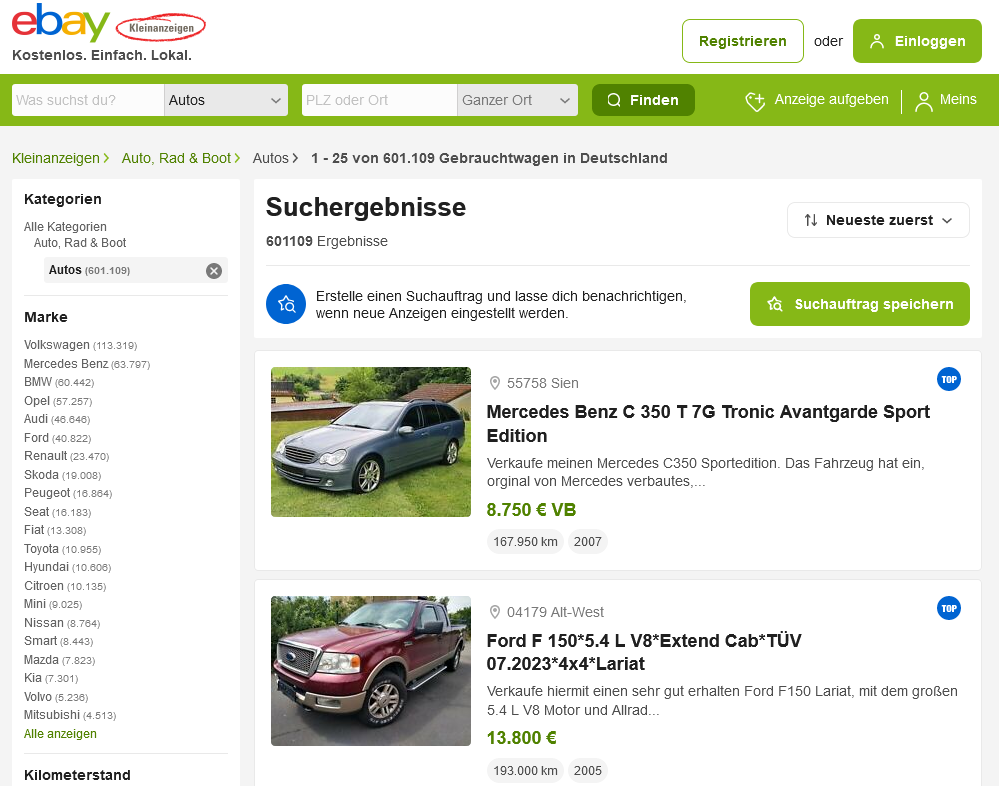

[*eBay Kleinanzeigen*](https://www.ebay-kleinanzeigen.de/s-auto-rad-boot/c289) is a classifieds website of ebay Germany. Just like any other classifieds website, the site allows users to post products and services which other users maybe interested in.
The site has specific sections for different product including a services section for cars, boats and bikes. The section is quite broad and its listings include:
- Vehicles being offered at a particular price
- Vehicles being requested at a particular price
- Vehicles being bartered for other items
- Vehicle parts
- Vehicle scraps
- Servicing offered for vehicle

The goal of this project will be to:
- Clean up the dataset
- Analyze the dataset and glean some useful insigts from the same.

It must be noted as mentioned above that the listings are quite broad. Our focus in this project will only be on listings associated to four-wheeled vehicles and not on parts or services associated to vehicles.

# 2

## Reading the Data

[Dataquest](https://www.dataquest.io/) has provided a dataset containing 50,000 listings for analysis. The 50000 listings have been randomly sample and contains erroneous data. The data dictionary associated to the data set has been provided below.
* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.

Lets read the dataset below.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
autos = pd.read_csv("autos.csv", encoding = "Latin-1")
autos.head(10)

dateCrawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   
5  2016-03-21 13:47:45  Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...   
6  2016-03-20 17:55:21  VW_Golf_III_GT_Special_Electronic_Green_Metall...   
7  2016-03-16 18:55:19                               Golf_IV_1.9_TDI_90PS   
8  2016-03-22 16:51:34                                         Seat_Arosa   
9  2016-03-16 13:47:02          Renault_Megane_Scenic_1.6e_RT_Klimaanlage   

   seller offerType   price   abtest vehicleType  yearOfRegistration  \
0  privat   Angebot  $5,000  control         bus                2004   
1  privat   Angebot  $8,500  control   limousine                1997   
2  privat   Angebot  $8,990     test   limousine                2009   
3  privat   Angebot  $4,350  control  kleinwagen                2007   
4  privat   Angebot  $1,350     test       kombi                2003   
5  privat   Angebot  $7,900     test         bus                2006   
6  privat   Angebot    $300     test   limousine                1995   
7  privat   Angebot  $1,990  control   limousine                1998   
8  privat   Angebot    $250     test         NaN                2000   
9  privat   Angebot    $590  control         bus                1997   

     gearbox  powerPS    model   odometer  monthOfRegistration fuelType  \
0    manuell      158   andere  150,000km                    3      lpg   
1  automatik      286      7er  150,000km                    6   benzin   
2    manuell      102     golf   70,000km                    7   benzin   
3  automatik       71   fortwo   70,000km                    6   benzin   
4    manuell        0    focus  150,000km                    7   benzin   
5  automatik      150  voyager  150,000km                    4   diesel   
6    manuell       90     golf  150,000km                    8   benzin   
7    manuell       90     golf  150,000km                   12   diesel   
8    manuell        0    arosa  150,000km                   10      NaN   
9    manuell       90   megane  150,000km                    7   benzin   

        brand notRepairedDamage          dateCreated  nrOfPictures  \
0     peugeot              nein  2016-03-26 00:00:00             0   
1         bmw              nein  2016-04-04 00:00:00             0   
2  volkswagen              nein  2016-03-26 00:00:00             0   
3       smart              nein  2016-03-12 00:00:00             0   
4        ford              nein  2016-04-01 00:00:00             0   
5    chrysler               NaN  2016-03-21 00:00:00             0   
6  volkswagen               NaN  2016-03-20 00:00:00             0   
7  volkswagen              nein  2016-03-16 00:00:00             0   
8        seat              nein  2016-03-22 00:00:00             0   
9     renault              nein  2016-03-16 00:00:00             0   

   postalCode             lastSeen  
0       79588  2016-04-06 06:45:54  
1       71034  2016-04-06 14:45:08  
2       35394  2016-04-06 20:15:37  
3       33729  2016-03-15 03:16:28  
4       39218  2016-04-01 14:38:50  
5       22962  2016-04-06 09:45:21  
6       31535  2016-03-23 02:48:59  
7       53474  2016-04-07 03:17:32  
8        7426  2016-03-26 18:18:10  
9       15749  2016-04-06 10:46:35

In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

The data is clearly from a German audience. A large number of columns have string type data. There are a number of columns with missing data like *vehicleType*, *gearbox* etc. 

In order to make analysis easier we will need to start by fixing the name of the columns. To begin with, the name of certain columns will need to be changed.

In [5]:
#Rename certain columns with relevant names
autos.rename(columns = {"yearOfRegistration":"registration_year",
                        "monthOfRegistration":"registration_month",
                        "notRepairedDamage":"unrepaired_damage",
                        "dateCreated":"ad_created"},
             inplace=True)

Now that we have renamed the columns, we can proceed to make the column name to snake case to make them consistent to Python standards.

In [6]:
def camel_to_snake(a_column_name):
    """
    Convert column name from camel to snake case
    
    Arg:
    a_column_name(str): Column name to be converted from camel to snake case
    
    Ret:
    a_column_name(str): Column name in snake case
    """
    pos = 0
    for letter in a_column_name:
        if letter.isupper() == True:
            pos = a_column_name.index(letter)
            string1 = a_column_name[:pos]
            string2 = a_column_name[pos:]
            a_column_name = string1+"_"+string2
    return (a_column_name.lower())

In [7]:
def bold_print(a_string,a_value=None):
    """
    Boldens the output
    
    Args:
        a_string (string): String to be bolded
    """
    print("\033[1m"+a_string+"\033[0m"+'\n')

In [8]:
autos_columns_fixed = []
for a_column in autos.columns:
    autos_columns_fixed.append(camel_to_snake(a_column))
autos.columns = autos_columns_fixed
bold_print("Cleaned column names")
autos.columns

Cleaned column names



Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_p_s', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

Now that we have clean column names it will be easier to refer to the columns in the dataset. Lets continue with cleaning the dataset further below. 

[Index](#Index)

# 3

## That doesn't look right....
**Issues in the data**

Lets assess the nature of the data that has been read below.

In [9]:
autos.describe(include = 'all')

date_crawled         name  seller offer_type  price abtest  \
count                 50000        50000   50000      50000  50000  50000   
unique                48213        38754       2          2   2357      2   
top     2016-03-23 18:39:34  Ford_Fiesta  privat    Angebot     $0   test   
freq                      3           78   49999      49999   1421  25756   
mean                    NaN          NaN     NaN        NaN    NaN    NaN   
std                     NaN          NaN     NaN        NaN    NaN    NaN   
min                     NaN          NaN     NaN        NaN    NaN    NaN   
25%                     NaN          NaN     NaN        NaN    NaN    NaN   
50%                     NaN          NaN     NaN        NaN    NaN    NaN   
75%                     NaN          NaN     NaN        NaN    NaN    NaN   
max                     NaN          NaN     NaN        NaN    NaN    NaN   

       vehicle_type  registration_year  gearbox     power_p_s  model  \
count         44905       50000.000000    47320  50000.000000  47242   
unique            8                NaN        2           NaN    245   
top       limousine                NaN  manuell           NaN   golf   
freq          12859                NaN    36993           NaN   4024   
mean            NaN        2005.073280      NaN    116.355920    NaN   
std             NaN         105.712813      NaN    209.216627    NaN   
min             NaN        1000.000000      NaN      0.000000    NaN   
25%             NaN        1999.000000      NaN     70.000000    NaN   
50%             NaN        2003.000000      NaN    105.000000    NaN   
75%             NaN        2008.000000      NaN    150.000000    NaN   
max             NaN        9999.000000      NaN  17700.000000    NaN   

         odometer  registration_month fuel_type       brand unrepaired_damage  \
count       50000        50000.000000     45518       50000             40171   
unique         13                 NaN         7          40                 2   
top     150,000km                 NaN    benzin  volkswagen              nein   
freq        32424                 NaN     30107       10687             35232   
mean          NaN            5.723360       NaN         NaN               NaN   
std           NaN            3.711984       NaN         NaN               NaN   
min           NaN            0.000000       NaN         NaN               NaN   
25%           NaN            3.000000       NaN         NaN               NaN   
50%           NaN            6.000000       NaN         NaN               NaN   
75%           NaN            9.000000       NaN         NaN               NaN   
max           NaN           12.000000       NaN         NaN               NaN   

                 ad_created  nr_of_pictures   postal_code            last_seen  
count                 50000         50000.0  50000.000000                50000  
unique                   76             NaN           NaN                39481  
top     2016-04-03 00:00:00             NaN           NaN  2016-04-07 06:17:27  
freq                   1946             NaN           NaN                    8  
mean                    NaN             0.0  50813.627300                  NaN  
std                     NaN             0.0  25779.747957                  NaN  
min                     NaN             0.0   1067.000000                  NaN  
25%                     NaN             0.0  30451.000000                  NaN  
50%                     NaN             0.0  49577.000000                  NaN  
75%                     NaN             0.0  71540.000000                  NaN  
max                     NaN             0.0  99998.000000                  NaN

At the outset the following issues come to light:
- The *price* column is meant to be float, however it is currently string. Also each price value is preceded by a *\$* symbol which must be removed.
- The *odometer* column also registers as a string instead of integer. In addition, each odometer reading is suffixed by *km* which must be removed.
- The columns *seller*, *offer_type* and *nr_of_pictures* have exactly the same data in every line which makes it irrelevant for analysis and thus can be considered for removal.

Lets begin by cleaning up the price and odometer columns.

In [10]:
autos['price'] = autos['price'].str.strip("$").str.replace(',','').astype('float')
autos['odometer'] = autos['odometer'].str.strip("km").str.replace(',','').astype('int')
autos.rename(columns = {'odometer':'odometer_km'},inplace=True)

The price and odometer columns have been cleaned by removing the special characters like *$*, *km* and *,* from the data.

Columns with the same data repeated multiple times will be dropped from the dataframe.

In [11]:
autos = autos.drop(["seller", "offer_type", "nr_of_pictures"], axis=1)
autos[:5]

date_crawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

    price   abtest vehicle_type  registration_year    gearbox  power_p_s  \
0  5000.0  control          bus               2004    manuell        158   
1  8500.0  control    limousine               1997  automatik        286   
2  8990.0     test    limousine               2009    manuell        102   
3  4350.0  control   kleinwagen               2007  automatik         71   
4  1350.0     test        kombi               2003    manuell          0   

    model  odometer_km  registration_month fuel_type       brand  \
0  andere       150000                   3       lpg     peugeot   
1     7er       150000                   6    benzin         bmw   
2    golf        70000                   7    benzin  volkswagen   
3  fortwo        70000                   6    benzin       smart   
4   focus       150000                   7    benzin        ford   

  unrepaired_damage           ad_created  postal_code            last_seen  
0              nein  2016-03-26 00:00:00        79588  2016-04-06 06:45:54  
1              nein  2016-04-04 00:00:00        71034  2016-04-06 14:45:08  
2              nein  2016-03-26 00:00:00        35394  2016-04-06 20:15:37  
3              nein  2016-03-12 00:00:00        33729  2016-03-15 03:16:28  
4              nein  2016-04-01 00:00:00        39218  2016-04-01 14:38:50

[Index](#Index)

# 4

## Seek and Ye shall find....
**Analysing the data further**

Considering that the columns seem clean a thorough analysis of each column will be required to find out whether the data itself has issues. A function has been created below to assess a given column by the column name.

In [12]:
def column_details(the_dataframe, a_column):
    """
    Provides more indepth detail of each column
    
    Args:
    the_dataframe(dataframe): Dataset
    a_column(string): Name of the column for which details are sought after 
    """
    
    #Prints the number of unique values in a given column
    print("Number of unique values in the {0} column:".format(a_column), the_dataframe[a_column].unique().shape[0])
    print("---------------------")
    
    #Prints data associated to the describe() function for a given column
    if the_dataframe[a_column].dtype == "object":
        print("Statistical data related to the {0} column:\n".format(a_column),the_dataframe[a_column].describe())
    else:
        print("Statistical data related to the {0} column:\n".format(a_column),the_dataframe[a_column].describe().map('{:,.2f}'.format))
    print("---------------------")
    
    #Prints the number of occurences of each unique_value
    print("Unique counts for each entry in the {0} column:\n".format(a_column))
    print(the_dataframe[a_column].value_counts().sort_index(ascending=True))

Assigning a column name in the cell below gives a statistical view of the data in the given column. 

In [13]:
#Details related to a column:
column_name = "price"
column_details(autos,column_name)

Number of unique values in the price column: 2357
---------------------
Statistical data related to the price column:
 count        50,000.00
mean          9,840.04
std         481,104.38
min               0.00
25%           1,100.00
50%           2,950.00
75%           7,200.00
max      99,999,999.00
Name: price, dtype: object
---------------------
Unique counts for each entry in the price column:

0.0           1421
1.0            156
2.0              3
3.0              1
5.0              2
              ... 
10000000.0       1
11111111.0       2
12345678.0       3
27322222.0       1
99999999.0       1
Name: price, Length: 2357, dtype: int64


After an in-depth analysis of every column, the following issues have been realised:
- *name*: is quite revealing. It shows that many of the items listed are not exactly vehicles. They can be advertisements for vehicle related services, parts of specific vehicles, exchange offers for vehicles, vehicles sold for scrap etc.
- *price*: is a reflection of the above column. There are prices in the range of $0.00-99.00 which is not usually the price of a vehicle. But these prices were against listings that were set up for exchange offers or toy models of a vehicle. They are not the actual asking price of the vehicle.
- *vehicle_type*: had missing values in many cases. This was especially true for the cases mentioned above.
- *registration_year*: is a mandatory field. However some of the values in it ranged from 1800-1950 and 2017-5000. This would have to be considered erroneous as the data was scraped in 2016 and as we all know cars were not available in the 1800s
- *registration_month*: values ranged from 0-12. The listing with 0 against them would have to be considered as erroneous data
- *brand* and *model*: had missing values. The issue that arose because of this will be revealed later

[Index](#Index)

# 5

## What is a Vehicle?
**Defining a Vehicle**

Before going forward a definition is required for a vehicle listing as our goal is to analyse the same. After a detailed analysis, the following is a definition for the listing of a vehicle for sale on the classifieds:

* It must have a price above $0.00 otherwise it was not meant for a sale

* It must have a valid registration year and month. Most car buyers look out for that information and most sellers make sure to put that up to ensure the car gets sold

* The year of registration must be between 1949-2018. One could argue that there were cars before 1949 but the assumptions is that those would be mostly collector's items. Also the number of cars below this year range are less. 

It must be noted that cars with registration years 2017 and 2018 have been considered even though the dataset is for 2016. The assumption is that this data has been manually inserted. It is doubtful the system itself would have given the user the ability to set these years. Moreover there are about 800 vehicles with these years and removing them all could affect analysis considering other eliminations that are being carried out. Lastly the vehicles with these years have all their other data in order and a quick search using their names on Google reveals that they are vehicles manufactured before 2016.

Finally, while we could also stipulate that the listing must have a vehicle_type it has been noticed that there are vehicle listings without vehicle types that have all their other information in order. For now this can be left out.

In [14]:
cleaned_autos = autos[autos["price"]!=0]
cleaned_autos = cleaned_autos[cleaned_autos["registration_year"].between(1949,2018)]
cleaned_autos = cleaned_autos[cleaned_autos["registration_month"]>0]
cleaned_autos[:5]

date_crawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   

    price   abtest vehicle_type  registration_year    gearbox  power_p_s  \
0  5000.0  control          bus               2004    manuell        158   
1  8500.0  control    limousine               1997  automatik        286   
2  8990.0     test    limousine               2009    manuell        102   
3  4350.0  control   kleinwagen               2007  automatik         71   
4  1350.0     test        kombi               2003    manuell          0   

    model  odometer_km  registration_month fuel_type       brand  \
0  andere       150000                   3       lpg     peugeot   
1     7er       150000                   6    benzin         bmw   
2    golf        70000                   7    benzin  volkswagen   
3  fortwo        70000                   6    benzin       smart   
4   focus       150000                   7    benzin        ford   

  unrepaired_damage           ad_created  postal_code            last_seen  
0              nein  2016-03-26 00:00:00        79588  2016-04-06 06:45:54  
1              nein  2016-04-04 00:00:00        71034  2016-04-06 14:45:08  
2              nein  2016-03-26 00:00:00        35394  2016-04-06 20:15:37  
3              nein  2016-03-12 00:00:00        33729  2016-03-15 03:16:28  
4              nein  2016-04-01 00:00:00        39218  2016-04-01 14:38:50

Based on the above filtering we should now have a set of vehicle listing.

[Index](#Index)

# 6

## Hallo to Hello
**Translating values from German to English**

The data values in some of the columns are in German. In order to speed-up analysis, it would be best to translate these values from German to English. The columns identified for the same are 
- *vehicle_type*
- *gearbox*
- *fuel_type*
- *unrepaired_damage*

In [15]:
#Translate column vehicle_type
cleaned_autos["vehicle_type"] = cleaned_autos["vehicle_type"].map({"andere":"others", "bus":"bus", 
                                                                   "cabrios":"convertible", "coupe":"coupe", 
                                                                   "kleinewagen":"small_car", "kombi":"combi", 
                                                                   "limousine":"limousine", "suv":"suv"}, 
                                                                  na_action='ignore')
#Translate column gearbox
cleaned_autos["gearbox"] = cleaned_autos["gearbox"].map({"manuell":"manual", "automatik":"automatic"}, na_action = 'ignore')

#Translate column fuel_type
cleaned_autos["fuel_type"] = cleaned_autos["fuel_type"].map({"andere":"others", "benzin":"gasoline", 
                                                             "cng":"cng", "diesel":"diesel", 
                                                             "elektro":"electric", "hybrid":"hybrid", "lpg":"lpg"}, 
                                                            na_action='ignore')

#Translate column unrepaired_damage
cleaned_autos["unrepaired_damage"] = cleaned_autos["unrepaired_damage"].map({"ja":"yes", "nein":"no"}, na_action = 'ignore')
cleaned_autos[:10]

date_crawled                                               name  \
0  2016-03-26 17:47:46                   Peugeot_807_160_NAVTECH_ON_BOARD   
1  2016-04-04 13:38:56         BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik   
2  2016-03-26 18:57:24                         Volkswagen_Golf_1.6_United   
3  2016-03-12 16:58:10  Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...   
4  2016-04-01 14:38:50  Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...   
5  2016-03-21 13:47:45  Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...   
6  2016-03-20 17:55:21  VW_Golf_III_GT_Special_Electronic_Green_Metall...   
7  2016-03-16 18:55:19                               Golf_IV_1.9_TDI_90PS   
8  2016-03-22 16:51:34                                         Seat_Arosa   
9  2016-03-16 13:47:02          Renault_Megane_Scenic_1.6e_RT_Klimaanlage   

    price   abtest vehicle_type  registration_year    gearbox  power_p_s  \
0  5000.0  control          bus               2004     manual        158   
1  8500.0  control    limousine               1997  automatic        286   
2  8990.0     test    limousine               2009     manual        102   
3  4350.0  control          NaN               2007  automatic         71   
4  1350.0     test        combi               2003     manual          0   
5  7900.0     test          bus               2006  automatic        150   
6   300.0     test    limousine               1995     manual         90   
7  1990.0  control    limousine               1998     manual         90   
8   250.0     test          NaN               2000     manual          0   
9   590.0  control          bus               1997     manual         90   

     model  odometer_km  registration_month fuel_type       brand  \
0   andere       150000                   3       lpg     peugeot   
1      7er       150000                   6  gasoline         bmw   
2     golf        70000                   7  gasoline  volkswagen   
3   fortwo        70000                   6  gasoline       smart   
4    focus       150000                   7  gasoline        ford   
5  voyager       150000                   4    diesel    chrysler   
6     golf       150000                   8  gasoline  volkswagen   
7     golf       150000                  12    diesel  volkswagen   
8    arosa       150000                  10       NaN        seat   
9   megane       150000                   7  gasoline     renault   

  unrepaired_damage           ad_created  postal_code            last_seen  
0                no  2016-03-26 00:00:00        79588  2016-04-06 06:45:54  
1                no  2016-04-04 00:00:00        71034  2016-04-06 14:45:08  
2                no  2016-03-26 00:00:00        35394  2016-04-06 20:15:37  
3                no  2016-03-12 00:00:00        33729  2016-03-15 03:16:28  
4                no  2016-04-01 00:00:00        39218  2016-04-01 14:38:50  
5               NaN  2016-03-21 00:00:00        22962  2016-04-06 09:45:21  
6               NaN  2016-03-20 00:00:00        31535  2016-03-23 02:48:59  
7                no  2016-03-16 00:00:00        53474  2016-04-07 03:17:32  
8                no  2016-03-22 00:00:00         7426  2016-03-26 18:18:10  
9                no  2016-03-16 00:00:00        15749  2016-04-06 10:46:35

[Index](#Index)

# 7

## The Price is Right....Wrong!
**Identifying a Price range**

Earlier while analyzing the *price* column it was noted that there were unusual prices for some listings. Some of the prices were as low as \\$1.00 and the most was \\$99,999,999 which seems to be unusally high. The prices require further analysis.

In [16]:
#Details related to a column:
column_name = "price"
column_details(cleaned_autos,column_name)

Number of unique values in the price column: 2316
---------------------
Statistical data related to the price column:
 count        44,074.00
mean         10,374.52
std         506,282.97
min               1.00
25%           1,399.00
50%           3,400.00
75%           7,900.00
max      99,999,999.00
Name: price, dtype: object
---------------------
Unique counts for each entry in the price column:

1.0           88
2.0            1
3.0            1
5.0            1
9.0            1
              ..
10000000.0     1
11111111.0     1
12345678.0     2
27322222.0     1
99999999.0     1
Name: price, Length: 2316, dtype: int64


Since there are a large number of values it would be better to divide the values in to bins.

In [17]:
bold_print("1000 bins created from the Price column")
cleaned_autos['price'].value_counts(bins = 1000).sort_index()

1000 bins created from the Price column



(-99998.99900000001, 100000.998]    44024
(100000.998, 200000.996]               31
(200000.996, 300000.994]                5
(300000.994, 400000.992]                2
(400000.992, 500000.99]                 0
                                    ...  
(99499999.01, 99599999.008]             0
(99599999.008, 99699999.006]            0
(99699999.006, 99799999.004]            0
(99799999.004, 99899999.002]            0
(99899999.002, 99999999.0]              1
Name: price, Length: 1000, dtype: int64

Based on the output above, it is clear that the maximum value for the price of a car that must be considered is 200000 because there are atleast 31 cars that fall in the price range 100,000-200,000. Given that the total number of listings is 44074, if we consider only the first 2 bins we would only be losing out on 19 (44074-44055) listings which is .04% of the total listings. 

While analysing the dataset for the lowest value of the price range it **was noticed that there were many listings for services that offered car shredding. These listings include the words *ausschlachten* or *schlachten* (literally means butchering).** Such listings need to be removed before considering a lower range as they have very low price values.

In [18]:
bold_print("Price listings with *schlachten* in the listing names and the number of occurences")
cleaned_autos[((cleaned_autos['name'].str.contains('schlachten')) == True)]["price"].value_counts()

Price listings with *schlachten* in the listing names and the number of occurences



200.0        11
100.0        11
350.0         8
150.0         8
250.0         7
300.0         6
800.0         4
450.0         3
600.0         3
500.0         3
120.0         3
700.0         2
1200.0        2
1.0           2
650.0         2
1000.0        2
130.0         2
400.0         2
370.0         1
890.0         1
248.0         1
249.0         1
850.0         1
1250.0        1
60.0          1
220.0         1
2500.0        1
470.0         1
75.0          1
385.0         1
50.0          1
175.0         1
290.0         1
1234566.0     1
1100.0        1
66.0          1
180.0         1
299.0         1
1950.0        1
Name: price, dtype: int64

In [19]:
bold_print("No. of listings with *schlachten*")
cleaned_autos[((cleaned_autos['name'].str.contains('schlachten')) == True)].shape[0]

No. of listings with *schlachten*



102

In [20]:
#Remove listing with the word *schlachten*
cleaned_autos = cleaned_autos[((cleaned_autos['name'].str.contains('schlachten')) == False)]

In [21]:
#Price column after removing 'schlacten' listings
column_name = "price"
column_details(cleaned_autos,column_name)

Number of unique values in the price column: 2312
---------------------
Statistical data related to the price column:
 count        43,972.00
mean         10,369.62
std         506,836.00
min               1.00
25%           1,400.00
50%           3,400.00
75%           7,900.00
max      99,999,999.00
Name: price, dtype: object
---------------------
Unique counts for each entry in the price column:

1.0           86
2.0            1
3.0            1
5.0            1
9.0            1
              ..
10000000.0     1
11111111.0     1
12345678.0     2
27322222.0     1
99999999.0     1
Name: price, Length: 2312, dtype: int64


After evaluating the dataset a minimum value of \\$200 seems to be the best option as there are many vehicles above that price. It must also be noted that **anything between \\$1-\\$200 does not seem to be a valid price for a car and are therefore not being considered.**

Based on the above understanding a valid price range for a vehicle has been identified as \\$200-\\$200,000. Any listing not within this range will be removed.

In [22]:
cleaned_autos = cleaned_autos[cleaned_autos["price"].between(200,200000)]
column_details( cleaned_autos, "price")

Number of unique values in the price column: 2241
---------------------
Statistical data related to the price column:
 count     43,433.00
mean       6,275.62
std        8,570.83
min          200.00
25%        1,450.00
50%        3,499.00
75%        7,990.00
max      198,000.00
Name: price, dtype: object
---------------------
Unique counts for each entry in the price column:

200.0       156
215.0         1
217.0         1
219.0         1
220.0        23
           ... 
180000.0      1
190000.0      1
194000.0      1
197000.0      1
198000.0      1
Name: price, Length: 2241, dtype: int64


[Index](#Index)

# 8

## Lets Talk Money
**Gleaning insights from the cleaned dataset**

Now that we have a cleaner dataset let us look in to analysing the same for some insights in to the data.

**Question**:How do German manufactured, most likely second hand vehicles, compare to each other when it comes to price?

In [23]:
#Identify all the brands in the dataset
cleaned_autos["brand"].value_counts()

volkswagen        9109
bmw               4860
opel              4493
mercedes_benz     4335
audi              3832
ford              2940
renault           2026
peugeot           1290
fiat              1086
seat               821
skoda              735
nissan             679
mazda              643
smart              640
citroen            611
toyota             577
hyundai            444
mini               404
volvo              403
sonstige_autos     388
honda              349
mitsubishi         348
kia                331
alfa_romeo         287
porsche            267
suzuki             254
chevrolet          250
chrysler           151
dacia              121
jeep               102
daihatsu           101
land_rover          93
subaru              84
saab                74
jaguar              68
daewoo              67
rover               58
lancia              46
trabant             42
lada                24
Name: brand, dtype: int64

Of the identified brands above, a quick search reveals that the following are German brands:
- Volkswagen
- BMW
- Opel
- Mercedes_benz
- Audi
- Ford
- Porsche

Using the price information we should be able to identify how the german car brands rank against each other.

In [24]:
import seaborn as sns
german_brands = ["volkswagen", "bmw", "opel", 
                 "mercedes_benz", "audi", "ford", 
                 "porsche"]
brand_mean_price = {}
for a_brand in german_brands:
    brand_mean_price[a_brand] = round(cleaned_autos[cleaned_autos["brand"] == a_brand]["price"].mean(),2)

#Creating a dataframe to plot a graph
mean_price_df = pd.Series(brand_mean_price).to_frame().reset_index()
mean_price_df.rename(columns = {"index":"brands", 0:"avg_price"},inplace=True)
mean_price_df

brands  avg_price
0     volkswagen    5763.51
1            bmw    8591.96
2           opel    3226.14
3  mercedes_benz    8861.82
4           audi    9729.99
5           ford    4036.91
6        porsche   43347.11

In [25]:
def gen_barplot(the_data,x_axis,y_axis,title):
    """
    Generate a barplot with a fixed style 
    
    Args:
    x_axis (string): Column name of joined_data for which values are to be plotted 
    y_axis (string): Column name of joined_data for which values are to be plotted
    title (string): Name of the plot
    """
    fig = matplotlib.pyplot.figure(figsize=(7,7))
    plt = sns.barplot(data = the_data, x = x_axis, y = y_axis)
    sns.despine(left = True, top=False, bottom=True)
    plt.set_title(title, size = 17)
    plt.set_xlabel(None)
    plt.set_ylabel(None)
    plt.tick_params(left=False, labelsize=13)
    plt.xaxis.tick_top()

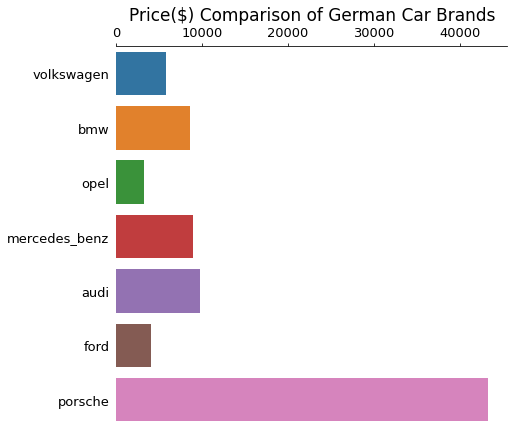

In [26]:
gen_barplot(mean_price_df,'avg_price','brands',"Price($) Comparison of German Car Brands")

**Insights**
- As seen **Porche is the most expensive brand** and clearly **an outlier** considering that its listing count is the least in comparison to other German brands
- The **second most expensive would be the Audi** averaging at 9715.78(Dollars)
- More **affordable German brands include Opel and Ford**

**Question**: An earlier insight revealed the brands and their average prices. However, these prices do not take in to account the distance covered by these vehicles. The more distance a vehicle has covered, the less its asking price (vice-versa may not be true as the age of the car also causes it to depreciate in value). Does this stand?

In [27]:
brand_mean_mileage = {}
for a_brand in german_brands:
    brand_mean_mileage[a_brand] = round(cleaned_autos[cleaned_autos["brand"] == a_brand]["odometer_km"].mean(),2)

mean_mileage_df = pd.Series(brand_mean_mileage).to_frame().reset_index()
mean_mileage_df.columns = ["brands","avg_mileage"]
mean_mileage_df

brands  avg_mileage
0     volkswagen    128281.37
1            bmw    132707.82
2           opel    128679.06
3  mercedes_benz    130979.24
4           audi    128837.42
5           ford    123882.65
6        porsche     99494.38

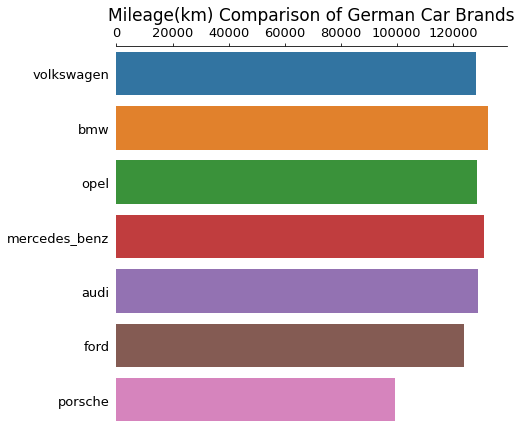

In [28]:
gen_barplot(mean_mileage_df,'avg_mileage','brands',"Mileage(km) Comparison of German Car Brands")

**Insight**
* **Brand value has preference over the distance covered by a vehicle when it comes to price.** A good example would be a comparison between the Audi and Opel. Both brands have almost the same average distance. But the mean price of the Audi is three times that of the Opel brand.

**Question**: What are the most common brand-model pairs?

In [29]:
common_brand_model = {}

for a_brand in cleaned_autos["brand"].unique():
    #List all models of a brand
    most_common_model=cleaned_autos[cleaned_autos["brand"] == a_brand]["model"].value_counts().sort_index(ascending = False)
    #Select the model with the most count
    if most_common_model.empty != True:
        common_brand_model[a_brand] = most_common_model.index[0]

brand_model = pd.Series(common_brand_model).to_frame().reset_index()
brand_model.columns = ["brand","top_model"]
brand_model

brand          top_model
0         peugeot             andere
1             bmw            z_reihe
2      volkswagen                 up
3           smart           roadster
4            ford            transit
5        chrysler            voyager
6            seat             toledo
7         renault             twingo
8            audi                 tt
9            opel             zafira
10          mazda           rx_reihe
11        porsche            cayenne
12           mini                one
13  mercedes_benz               vito
14         toyota              yaris
15          dacia            sandero
16         nissan            x_trail
17           jeep           wrangler
18           saab             andere
19          volvo           xc_reihe
20     mitsubishi             pajero
21         jaguar             x_type
22           fiat              stilo
23          skoda               yeti
24         subaru             legacy
25            kia           sportage
26        citroen                 c5
27      chevrolet              spark
28        hyundai             tucson
29          honda               jazz
30         daewoo             nubira
31         suzuki              swift
32        trabant             andere
33     land_rover  range_rover_sport
34     alfa_romeo             spider
35       daihatsu             terios
36          rover         rangerover
37         lancia            ypsilon
38           lada             samara

**Insights**
* There are multiple brands for which models have not been listed. For these, the models have been listed as 'andere'(meaning others)
* One of the brands not in this list is sonstige_autos which does not have a single model listed against it. I believe they might be resellers but I cannot be sure of it.

**Question**: How does damage affect the price of a vehicle?

In [30]:
repaired_mean_price = {}
non_repaired_mean_price = {}

for a_brand in cleaned_autos["brand"].unique():
    the_brand = cleaned_autos[cleaned_autos["brand"] == a_brand] # Select a brand
    
    #Select repaired and damaged vehicles of the brand
    its_repaired_vehicles = the_brand[the_brand["unrepaired_damage"] == "no"] 
    its_non_repaired_vehicles = the_brand[the_brand["unrepaired_damage"] == "yes"]
    
    #Calculate mean price of repaired and damaged vehicles.
    repaired_mean_price[a_brand] = round(its_repaired_vehicles["price"].mean(),2)
    non_repaired_mean_price[a_brand] = round(its_non_repaired_vehicles["price"].mean(),2)
    
repaired_mean_price_series = pd.Series(repaired_mean_price)
non_repaired_mean_price_series = pd.Series(non_repaired_mean_price)

In [31]:
#Tabulate the mean prices
repair_vs_non_repair = pd.DataFrame(repaired_mean_price_series, columns = ["repaired_mean_price"])
repair_vs_non_repair["non_repaired_mean_price"] = non_repaired_mean_price_series
repair_vs_non_repair["ratio"] = round(repair_vs_non_repair["repaired_mean_price"]/repair_vs_non_repair["non_repaired_mean_price"],2)
repair_vs_non_repair

repaired_mean_price  non_repaired_mean_price  ratio
peugeot                     3693.94                  1568.28   2.36
bmw                         9469.24                  3848.39   2.46
volkswagen                  6597.75                  2426.36   2.72
smart                       3924.23                  1488.15   2.64
ford                        4739.69                  1587.60   2.99
chrysler                    4013.97                  2239.00   1.79
seat                        5230.90                  1854.59   2.82
renault                     3151.62                  1286.69   2.45
audi                       10969.08                  3541.31   3.10
sonstige_autos             15068.17                  5916.76   2.55
opel                        3727.36                  1573.46   2.37
mazda                       5195.75                  1605.02   3.24
porsche                    46256.49                 14670.00   3.15
mini                       11138.89                  4595.00   2.42
mercedes_benz               9825.39                  4126.84   2.38
toyota                      5656.65                  3630.95   1.56
dacia                       6217.42                  4459.62   1.39
nissan                      5804.16                  2112.18   2.75
jeep                       12537.60                  3074.88   4.08
saab                        3942.26                   657.00   6.00
volvo                       5861.22                  1669.21   3.51
mitsubishi                  4274.43                  1568.20   2.73
jaguar                     14118.36                  4993.62   2.83
fiat                        3542.51                  1405.57   2.52
skoda                       7143.40                  3735.67   1.91
subaru                      5544.50                  2856.29   1.94
kia                         6971.32                  2177.12   3.20
citroen                     4293.60                  2067.51   2.08
chevrolet                   7425.04                  3766.81   1.97
hyundai                     6216.83                  2964.89   2.10
honda                       5035.65                  1560.19   3.23
daewoo                      1206.51                   524.80   2.30
suzuki                      4861.12                  1726.00   2.82
trabant                     3091.76                   817.25   3.78
land_rover                 21688.51                  5223.75   4.15
alfa_romeo                  4880.84                  2118.50   2.30
daihatsu                    1828.56                   950.00   1.92
rover                       1962.26                   888.50   2.21
lancia                      3106.69                  4774.50   0.65
lada                        3064.41                  1400.00   2.19

In [32]:
#Reset the index and rename the original index column
repair_vs_non_repair = repair_vs_non_repair.reset_index()
repair_vs_non_repair.rename(columns = {'index':'brand'},inplace=True)

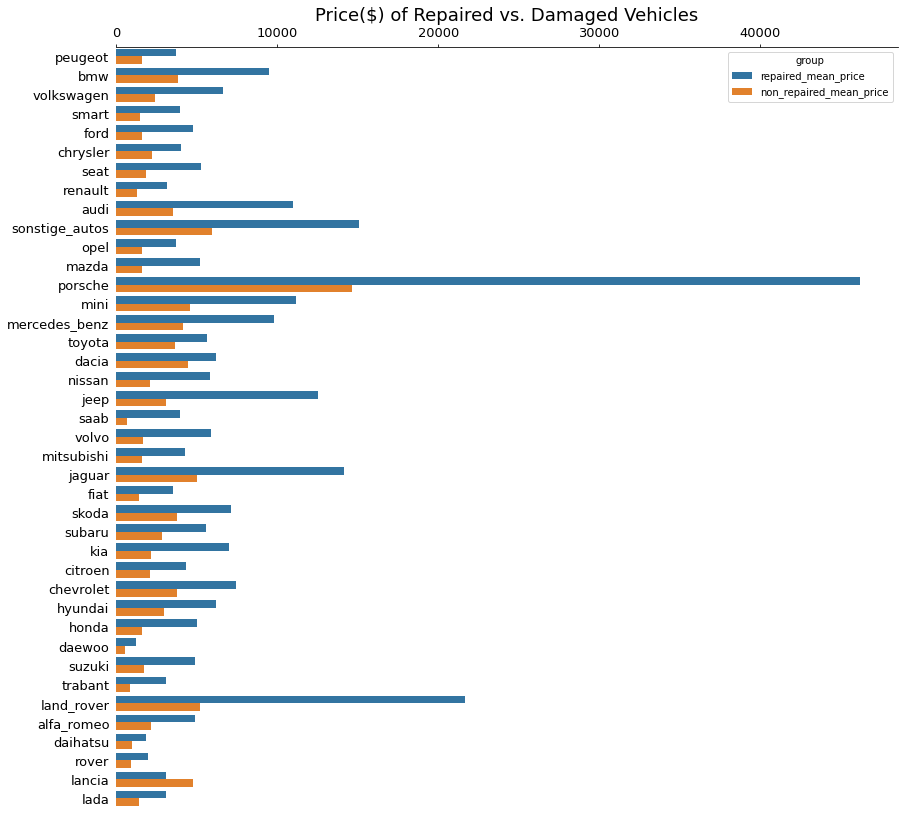

In [33]:
#Plot the tabulated mean prices
melted_df = repair_vs_non_repair[['brand','repaired_mean_price','non_repaired_mean_price']].melt(id_vars='brand',
                                                                                                 var_name = 'group',
                                                                                                 value_name = 'mean_price')
fig = plt.figure(figsize = (14,14))
sns.barplot(data = melted_df, x = 'mean_price', y = 'brand', hue = 'group')
sns.despine(left = True, top=False, bottom=True)
plt.title("Price($) of Repaired vs. Damaged Vehicles",size=18)
plt.tick_params(left=False, labelsize=13)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

It is quite clear that **repaired vehicles cost significantly more than non-repaired vehilcles.** What is more revealing is that  repaired vehicles of big brand names tend to cost significantly more than their damaged counterparts. e.g. Porche, Land Rover, Jaguar etc.

In [34]:
print("On average a repaired vehicle can be priced at {0} times its damaged counterpart".format(round(repair_vs_non_repair["ratio"].mean(),2)))

On average a repaired vehicle can be priced at 2.64 times its damaged counterpart


**Insights**
- On average a **repaired vehicle can be priced at 2.6 times its damaged counterpart**
- Repaired vehicles with great brand value tend to be priced signficantly more than their damaged counterparts.

[Index](#Index)

# 9

## Conclusion
**A quick summary**

eBay Kleinanzeige has a lot of listings related to different vehicles including their servicing and parts. Through this project we were able to extract, clean and review a pre-sampled version of their unclean listing data related to cars from 2016.

Cleaning the data involved the removal of multiple rows and columns. Once the dataset was cleaned multiple insights were gained from the dataset. One was that repaired cars tend to cost almost thrice their damaged counterparts. Another was that German vehicles that belong to big brand names tend to cost more despite the distance tha vehicles have travelled. A third revelation was that big brand German vehicles tend to cost significantly more than their common used counterparts.

[Index](#Index)